this is rough eda..

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [43]:
fear_greed_df = pd.read_csv('fear_greed_index.csv')
fear_greed_df.head(10)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [39]:
historical_df = pd.read_csv('historical_data.csv')
historical_df.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [40]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [41]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [42]:
fear_greed_df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


from matplotlib import pyplot as plt
_df_0['timestamp'].plot(kind='hist', bins=20, title='timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='timestamp', y='value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['timestamp'].plot(kind='line', figsize=(8, 4), title='timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [44]:
historical_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [45]:
fear_greed_df['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

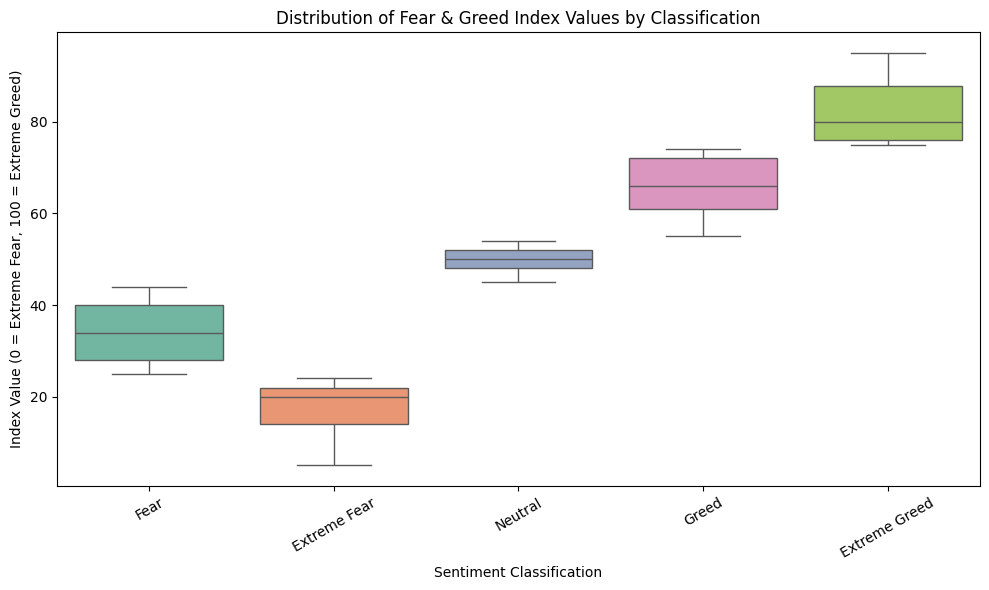

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(data=fear_greed_df ,x="classification", y="value", hue = "classification",
            palette="Set2")

plt.title("Distribution of Fear & Greed Index Values by Classification")
plt.xlabel("Sentiment Classification")
plt.ylabel("Index Value (0 = Extreme Fear, 100 = Extreme Greed)")
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

/tmp/ipython-input-2598755978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_values, x="classification", y="value", palette="Set2")


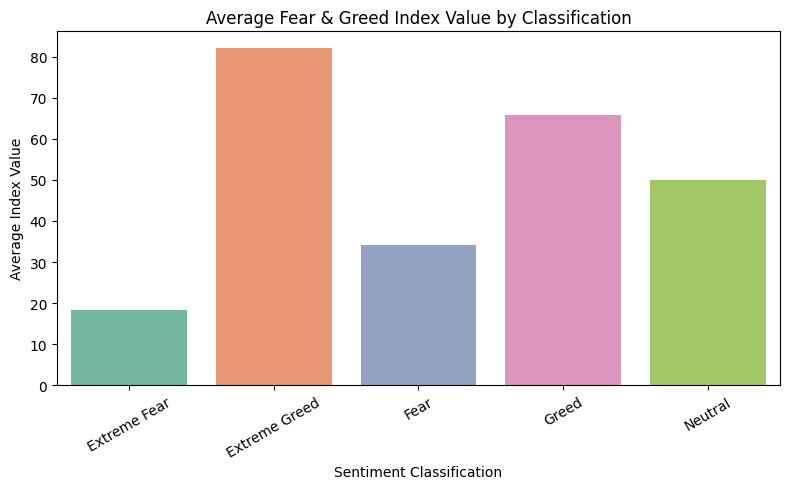

In [48]:

avg_values = fear_greed_df.groupby("classification")["value"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_values, x="classification", y="value", palette="Set2")
plt.title("Average Fear & Greed Index Value by Classification")
plt.xlabel("Sentiment Classification")
plt.ylabel("Average Index Value")
plt.xticks(rotation=30)
plt.tight_layout()

plt.show()

In [52]:
# Convert timestamp to datetime
fear_greed_df["datetime"] = pd.to_datetime(fear_greed_df["timestamp"], unit="s")

# Keep only datetime + classification
fear_greed_clean = fear_greed_df[["datetime","classification"]]



In [53]:
fear_greed_clean.head()

,datetime,classification
0,2018-02-01 05:30:00,Fear
1,2018-02-02 05:30:00,Extreme Fear
2,2018-02-03 05:30:00,Fear
3,2018-02-04 05:30:00,Extreme Fear
4,2018-02-05 05:30:00,Extreme Fear


In [54]:
historical_df.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,02-12-2024 22:50,1298.215466,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.000493,7.330000e+14,1.730000e+12
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,02-12-2024 22:50,1299.624972,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,9.060000e+14,1.730000e+12
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,02-12-2024 22:50,1443.664541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.011900,3.960000e+14,1.730000e+12
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,02-12-2024 22:50,1477.652641,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.016100,9.460000e+14,1.730000e+12
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,02-12-2024 22:50,1523.636541,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.004375,3.470000e+13,1.730000e+12


In [55]:
historical_df['Coin'].unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [56]:
historical_df.shape

(211224, 16)

# Trader Dataset Column Meanings

- **Index**: Row number in the dataset (not used for analysis).
- **Account**: Unique trader wallet/address identifier.
- **Coin**: Asset code or symbol being traded (e.g., BTC, ETH).
- **Execution Price**: Price at which the trade was executed.
- **Size Tokens**: Trade size measured in number of tokens.
- **Size USD**: Trade size converted into USD value.
- **Side**: Trade direction — Buy or Sell.
- **Timestamp IST**: Local time (India Standard Time) when the trade occurred.
- **Start Position**: Trader’s position size before this trade.
- **Direction**: Trade orientation (Buy/Sell), often redundant with Side.
- **Closed PnL**: Profit or loss realized when the trade was closed.
- **Transaction Hash**: Blockchain transaction identifier for the trade.
- **Order ID**: Internal system identifier for the order.
- **Crossed**: Flag indicating whether the order crossed the book (true/false).
- **Fee**: Trading fee charged for the transaction.
- **Trade ID**: Unique identifier for the trade record.
- **Timestamp**: Unix timestamp (seconds since 1970) for precise trade time.


# Assignment Questions

1. **Risk Behavior**
   - Do traders take higher leverage when the market is in Greed compared to Fear?
   - Is leverage distribution different across sentiment states?

2. **Trading Volume**
   - Is total trade volume larger on Greed days than Fear days?
   - Do traders reduce activity during Fear?

3. **Profitability**
   - Are traders more profitable (PnL) in Fear or in Greed?
   - Does the win rate (% of profitable trades) change with sentiment?

4. **Buy vs Sell Choices**
   - Do traders prefer buying in Greed and selling in Fear?
   - Are leverage or PnL different between Buy vs Sell trades under different sentiments?

5. **Hidden Signals**
   - Are there any counterintuitive findings (e.g., traders lose more money in Greed despite higher volume)?
   - Do extreme behaviors (like very high leverage) correlate with sentiment in unexpected ways?


In [61]:

# 1. Convert Unix Timestamp to datetime
historical_df["datetime"] = pd.to_datetime(historical_df["Timestamp"], unit="ms")

# 2. Drop ID/metadata columns + both time columns
cols_to_drop = [
    "Account",
    "Transaction Hash",
    "Order ID",
    "Trade ID",
    "Timestamp",        # raw Unix timestamp
    "Timestamp IST"     # human-readable duplicate
]

historical_df_clean = historical_df.drop(columns=cols_to_drop, errors="ignore")

# 3. Preview cleaned dataframe
historical_df_clean.head(10)


,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,datetime
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,0.345404,2024-10-27 03:33:20
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,0.005600,2024-10-27 03:33:20
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,0.050431,2024-10-27 03:33:20
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,0.050043,2024-10-27 03:33:20
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,0.003055,2024-10-27 03:33:20
5,@107,7.9900,1.41,11.27,BUY,1298.215466,Buy,0.0,True,0.000493,2024-10-27 03:33:20
6,@107,7.9934,144.09,1151.77,BUY,1299.624972,Buy,0.0,True,0.050431,2024-10-27 03:33:20
7,@107,8.0000,34.00,272.00,BUY,1443.664541,Buy,0.0,True,0.011900,2024-10-27 03:33:20
8,@107,8.0000,46.00,368.00,BUY,1477.652641,Buy,0.0,True,0.016100,2024-10-27 03:33:20
9,@107,8.0000,12.50,100.00,BUY,1523.636541,Buy,0.0,True,0.004375,2024-10-27 03:33:20


In [59]:
historical_df_clean.shape

(211224, 11)

In [60]:
historical_df.shape

(211224, 17)

In [62]:
historical_df_clean['Direction'].unique()

array(['Buy', 'Sell', 'Open Long', 'Close Long', 'Spot Dust Conversion',
       'Open Short', 'Close Short', 'Long > Short', 'Short > Long',
       'Auto-Deleveraging', 'Liquidated Isolated Short', 'Settlement'],
      dtype=object)

In [63]:
historical_df_clean['Side'].unique()

array(['BUY', 'SELL'], dtype=object)

In [64]:
cols_to_drop = ["Fee", "Coin", ]

historical_df_clean = historical_df_clean.drop(columns=cols_to_drop, errors="ignore")

In [65]:
historical_df_clean.head(10)

,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,datetime
0,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,2024-10-27 03:33:20
1,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,2024-10-27 03:33:20
2,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,2024-10-27 03:33:20
3,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,2024-10-27 03:33:20
4,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,2024-10-27 03:33:20
5,7.9900,1.41,11.27,BUY,1298.215466,Buy,0.0,True,2024-10-27 03:33:20
6,7.9934,144.09,1151.77,BUY,1299.624972,Buy,0.0,True,2024-10-27 03:33:20
7,8.0000,34.00,272.00,BUY,1443.664541,Buy,0.0,True,2024-10-27 03:33:20
8,8.0000,46.00,368.00,BUY,1477.652641,Buy,0.0,True,2024-10-27 03:33:20
9,8.0000,12.50,100.00,BUY,1523.636541,Buy,0.0,True,2024-10-27 03:33:20


In [66]:
cols_to_drop = ['Direction ' ]

historical_df_clean = historical_df_clean.drop(columns=cols_to_drop, errors="ignore")

In [67]:
historical_df_clean.head(10)

,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,datetime
0,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,2024-10-27 03:33:20
1,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,2024-10-27 03:33:20
2,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,2024-10-27 03:33:20
3,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,2024-10-27 03:33:20
4,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,2024-10-27 03:33:20
5,7.9900,1.41,11.27,BUY,1298.215466,Buy,0.0,True,2024-10-27 03:33:20
6,7.9934,144.09,1151.77,BUY,1299.624972,Buy,0.0,True,2024-10-27 03:33:20
7,8.0000,34.00,272.00,BUY,1443.664541,Buy,0.0,True,2024-10-27 03:33:20
8,8.0000,46.00,368.00,BUY,1477.652641,Buy,0.0,True,2024-10-27 03:33:20
9,8.0000,12.50,100.00,BUY,1523.636541,Buy,0.0,True,2024-10-27 03:33:20


from matplotlib import pyplot as plt
_df_11['Execution Price'].plot(kind='hist', bins=20, title='Execution Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Size Tokens'].plot(kind='hist', bins=20, title='Size Tokens')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Size USD'].plot(kind='hist', bins=20, title='Size USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Start Position'].plot(kind='hist', bins=20, title='Start Position')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Execution Price', y='Size Tokens', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Size Tokens', y='Size USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Size USD', y='Start Position', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Execution Price']
  ys = series['Size Tokens']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('Execution Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Price')
_ = plt.ylabel('Size Tokens')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Execution Price']
  ys = series['Size USD']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('Execution Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Price')
_ = plt.ylabel('Size USD')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Execution Price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Execution Price'}, axis=1)
              .sort_values('Execution Price', ascending=True))
  xs = counted['Execution Price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('Execution Price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Execution Price')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Start Position']
  ys = series['Size Tokens']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('Start Position', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Start Position')
_ = plt.ylabel('Size Tokens')

from matplotlib import pyplot as plt
_df_22['Execution Price'].plot(kind='line', figsize=(8, 4), title='Execution Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Size Tokens'].plot(kind='line', figsize=(8, 4), title='Size Tokens')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Size USD'].plot(kind='line', figsize=(8, 4), title='Size USD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Start Position'].plot(kind='line', figsize=(8, 4), title='Start Position')
plt.gca().spines[['top', 'right']].set_visible(False)

In [68]:
# Step 1: Extract just the date part from datetime
historical_df_clean["date"] = pd.to_datetime(historical_df_clean["datetime"]).dt.date
fear_greed_clean["date"] = pd.to_datetime(fear_greed_clean["datetime"]).dt.date

# Step 2: Merge on date
merged_df = pd.merge(
    historical_df_clean,
    fear_greed_clean[["date", "classification"]],
    on="date",
    how="left"
)

merged_df.head()

/tmp/ipython-input-3832603498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fear_greed_clean["date"] = pd.to_datetime(fear_greed_clean["datetime"]).dt.date


,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,datetime,date,classification
0,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,True,2024-10-27 03:33:20,2024-10-27,Greed
1,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,True,2024-10-27 03:33:20,2024-10-27,Greed
2,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,True,2024-10-27 03:33:20,2024-10-27,Greed
3,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,True,2024-10-27 03:33:20,2024-10-27,Greed
4,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,True,2024-10-27 03:33:20,2024-10-27,Greed


In [69]:
historical_df_clean.shape

(211224, 10)

In [70]:
fear_greed_clean.shape

(2644, 3)

In [71]:
merged_df.shape

(211224, 11)

/tmp/ipython-input-4100926003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl, x="classification", y="Closed PnL", palette="coolwarm")


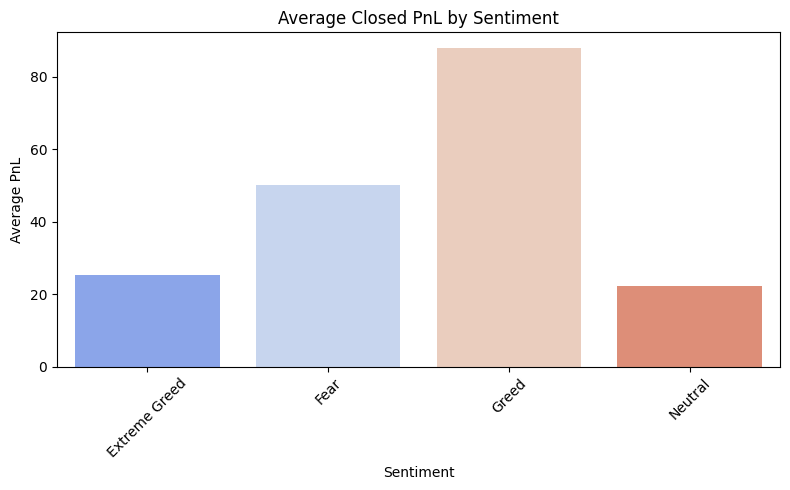

In [72]:
# Group and plot
avg_pnl = merged_df.groupby("classification")["Closed PnL"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_pnl, x="classification", y="Closed PnL", palette="coolwarm")
plt.title("Average Closed PnL by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2654134206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_volume, x="classification", y="Size USD", palette="viridis")


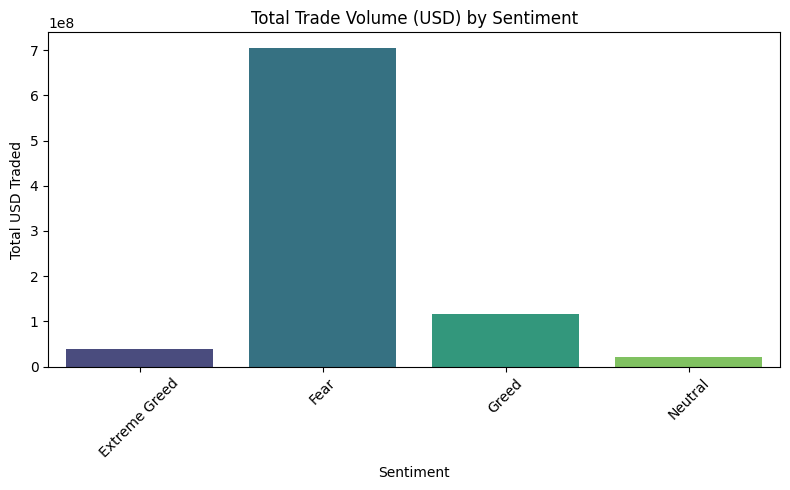

In [73]:
total_volume = merged_df.groupby("classification")["Size USD"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=total_volume, x="classification", y="Size USD", palette="viridis")
plt.title("Total Trade Volume (USD) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Total USD Traded")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


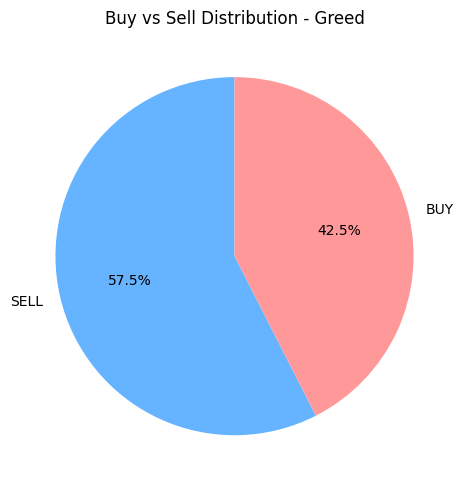

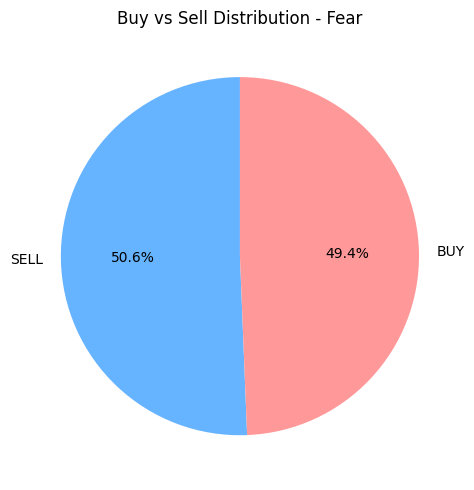

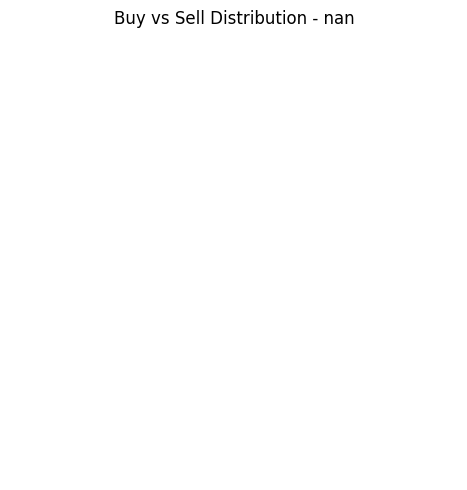

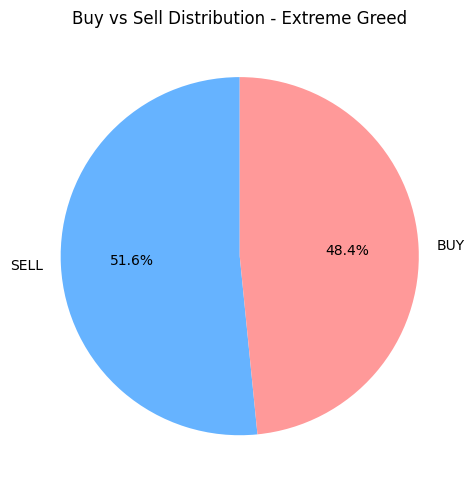

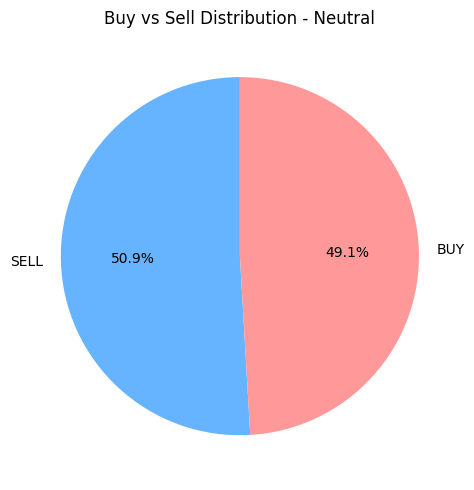

In [74]:
# Loop through each sentiment
for sentiment in merged_df["classification"].unique():
    subset = merged_df[merged_df["classification"] == sentiment]
    side_counts = subset["Side"].value_counts()

    plt.figure(figsize=(5,5))
    plt.pie(side_counts, labels=side_counts.index, autopct="%1.1f%%", startangle=90, colors=["#66b3ff", "#ff9999"])
    plt.title(f"Buy vs Sell Distribution - {sentiment}")
    plt.tight_layout()
    plt.show()


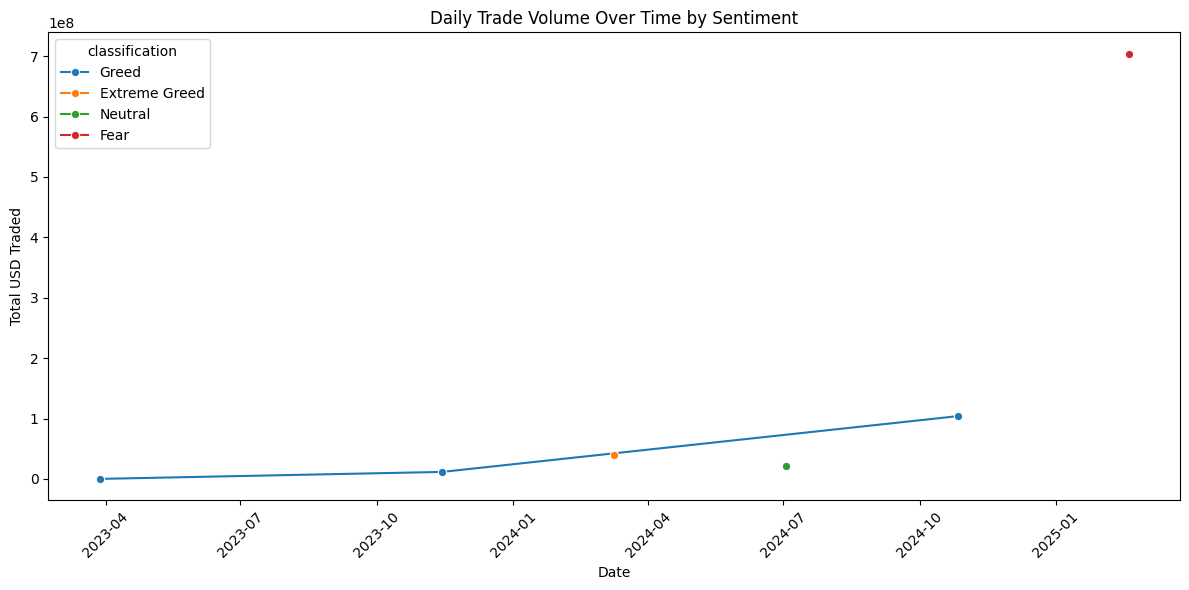

In [75]:
# Aggregate daily volume
daily_volume = merged_df.groupby(["date", "classification"])["Size USD"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_volume, x="date", y="Size USD", hue="classification", marker="o")
plt.title("Daily Trade Volume Over Time by Sentiment")
plt.xlabel("Date")
plt.ylabel("Total USD Traded")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-526110217.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_rate, x="classification", y="Profit Rate (%)", palette="Set2")


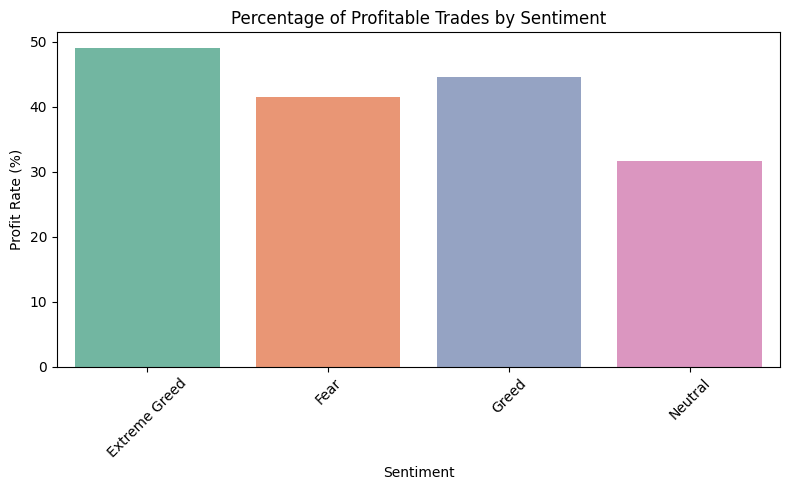

In [76]:
# Calculate % profitable trades (Closed PnL > 0)
profit_rate = merged_df.groupby("classification")["Closed PnL"].apply(lambda x: (x > 0).mean() * 100).reset_index(name="Profit Rate (%)")

plt.figure(figsize=(8,5))
sns.barplot(data=profit_rate, x="classification", y="Profit Rate (%)", palette="Set2")
plt.title("Percentage of Profitable Trades by Sentiment")
plt.ylabel("Profit Rate (%)")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1245119495.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_start_pos, x="classification", y="Start Position", palette="mako")


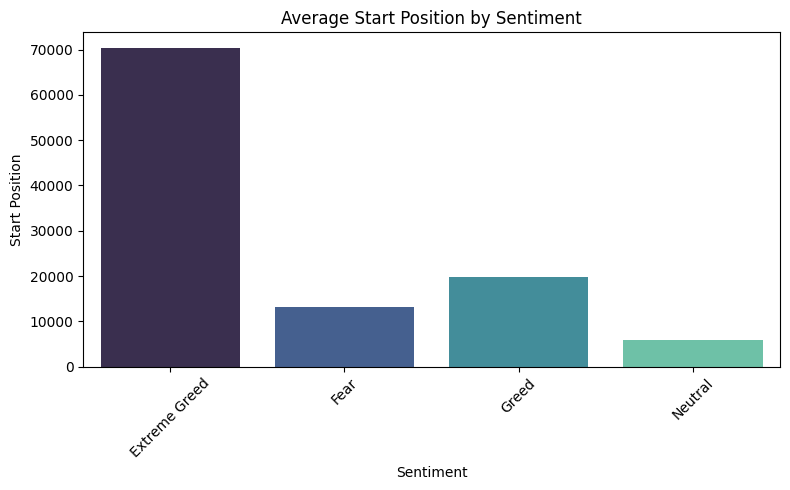

In [77]:
avg_start_pos = merged_df.groupby("classification")["Start Position"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_start_pos, x="classification", y="Start Position", palette="mako")
plt.title("Average Start Position by Sentiment")
plt.ylabel("Start Position")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-696014416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="classification", y="Closed PnL", palette="pastel")


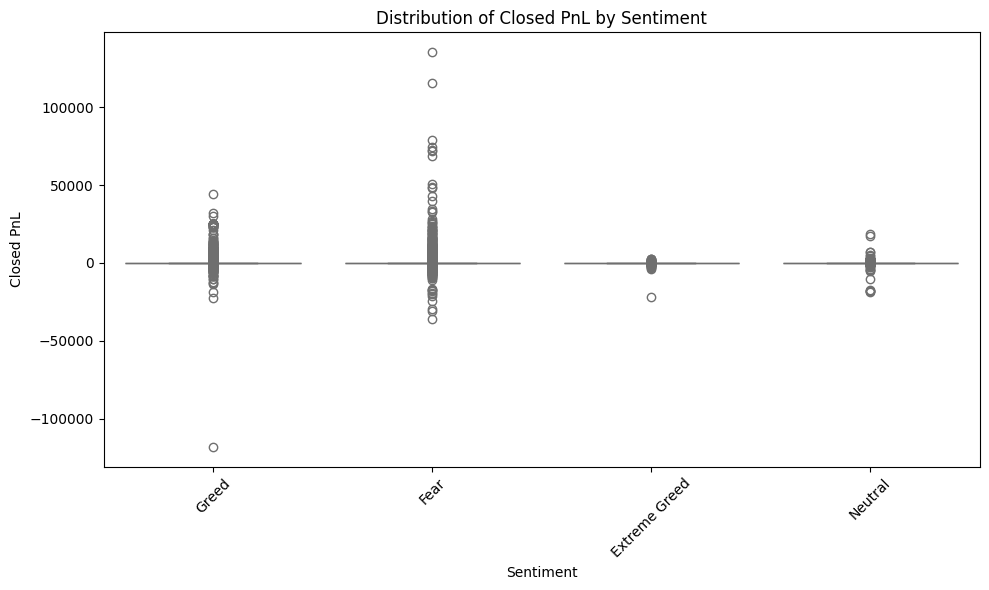

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x="classification", y="Closed PnL", palette="pastel")
plt.title("Distribution of Closed PnL by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


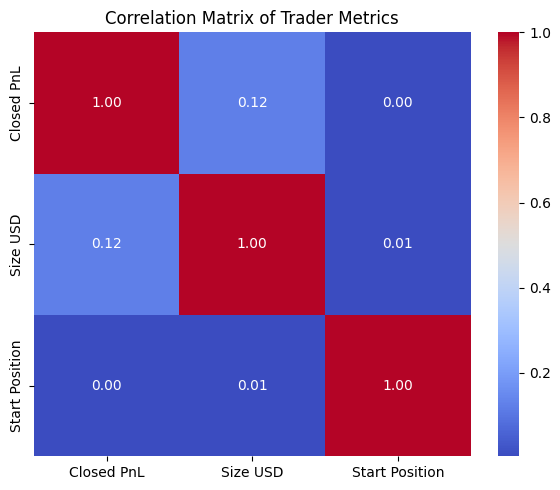

In [79]:
# Select numeric columns
numeric_cols = merged_df[["Closed PnL", "Size USD", "Start Position"]]

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Trader Metrics")
plt.tight_layout()
plt.show()


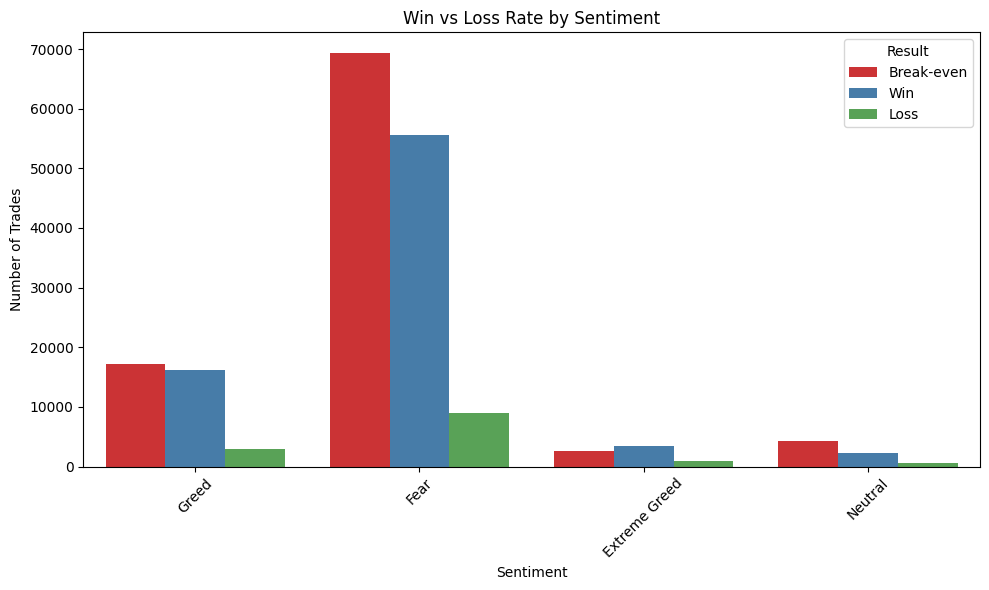

In [80]:
win_loss = merged_df.copy()
win_loss["Result"] = win_loss["Closed PnL"].apply(lambda x: "Win" if x > 0 else ("Loss" if x < 0 else "Break-even"))

plt.figure(figsize=(10,6))
sns.countplot(data=win_loss, x="classification", hue="Result", palette="Set1")
plt.title("Win vs Loss Rate by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-152918655.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_size, x="classification", y="Size USD", palette="cubehelix")


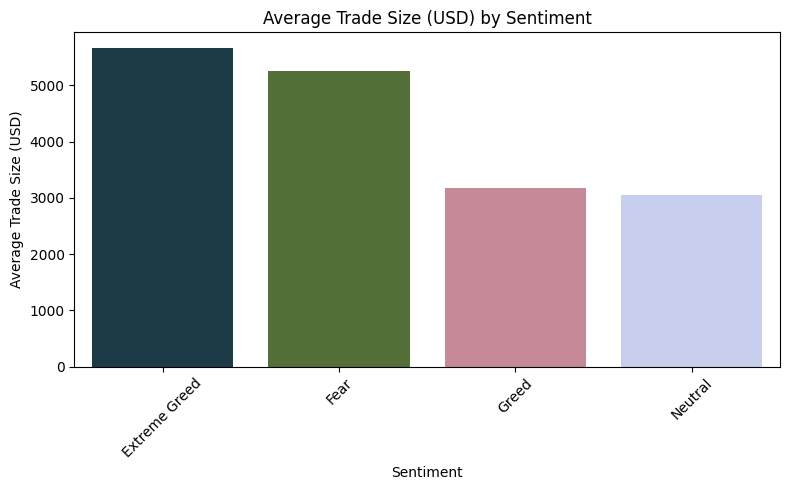

In [81]:
avg_size = merged_df.groupby("classification")["Size USD"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_size, x="classification", y="Size USD", palette="cubehelix")
plt.title("Average Trade Size (USD) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


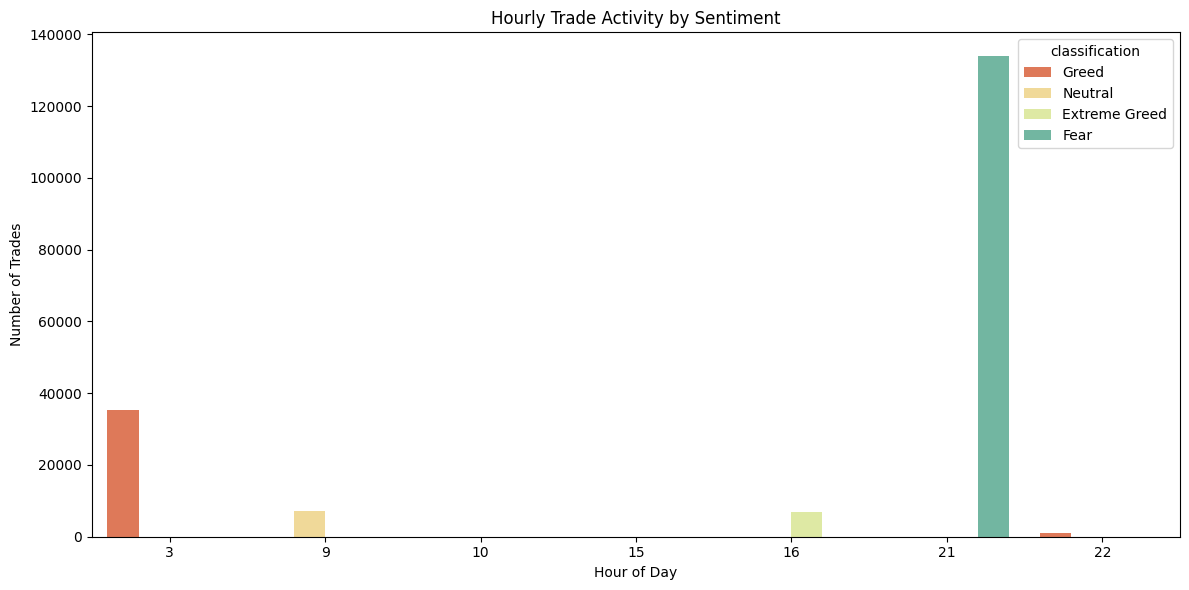

In [82]:
merged_df["hour"] = pd.to_datetime(merged_df["datetime"]).dt.hour

plt.figure(figsize=(12,6))
sns.countplot(data=merged_df, x="hour", hue="classification", palette="Spectral")
plt.title("Hourly Trade Activity by Sentiment")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trades")
plt.tight_layout()
plt.show()


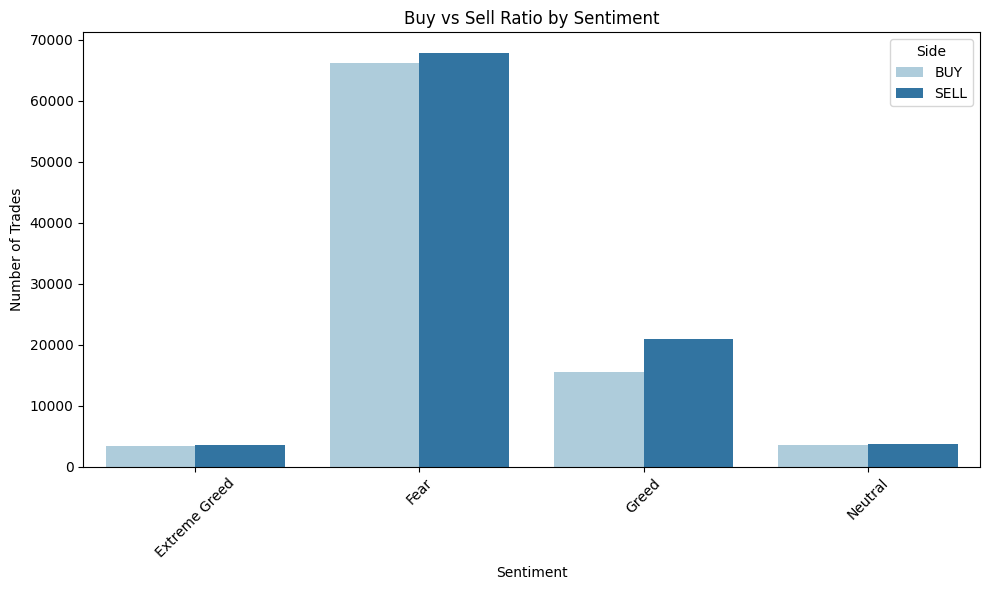

In [83]:
side_ratio = merged_df.groupby(["classification","Side"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=side_ratio, x="classification", y="count", hue="Side", palette="Paired")
plt.title("Buy vs Sell Ratio by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1253734071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_volatility, x="classification", y="Closed PnL", palette="flare")


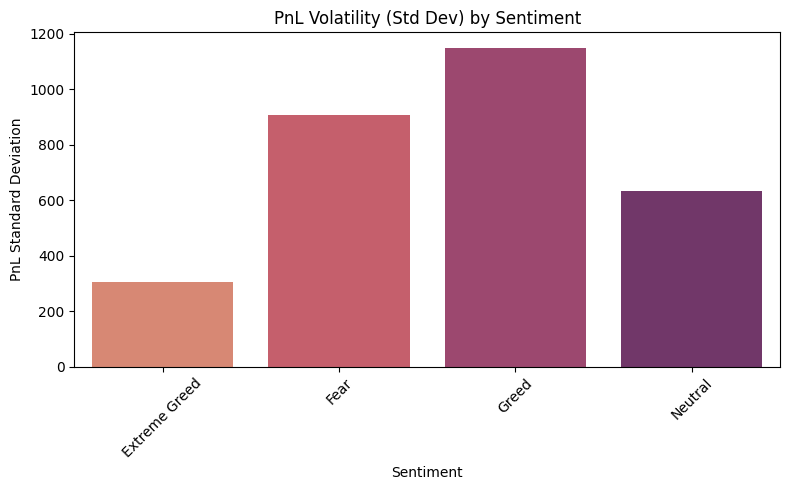

In [84]:
pnl_volatility = merged_df.groupby("classification")["Closed PnL"].std().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=pnl_volatility, x="classification", y="Closed PnL", palette="flare")
plt.title("PnL Volatility (Std Dev) by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("PnL Standard Deviation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


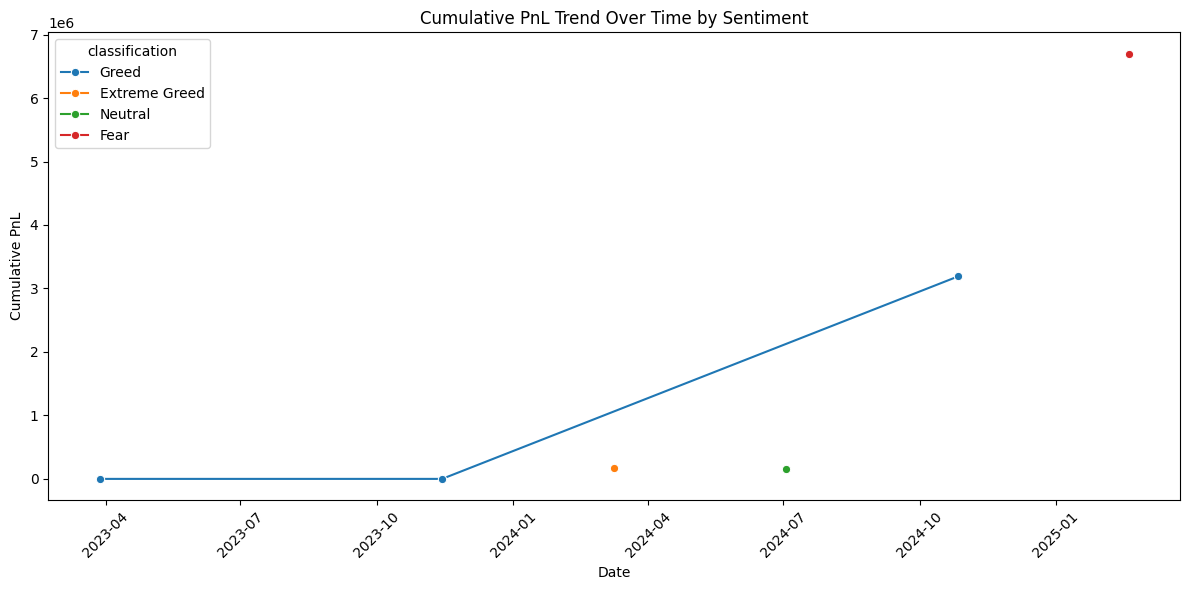

In [85]:
daily_pnl = merged_df.groupby(["date","classification"])["Closed PnL"].sum().reset_index()
daily_pnl["Cumulative PnL"] = daily_pnl.groupby("classification")["Closed PnL"].cumsum()

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_pnl, x="date", y="Cumulative PnL", hue="classification", marker="o")
plt.title("Cumulative PnL Trend Over Time by Sentiment")
plt.xlabel("Date")
plt.ylabel("Cumulative PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


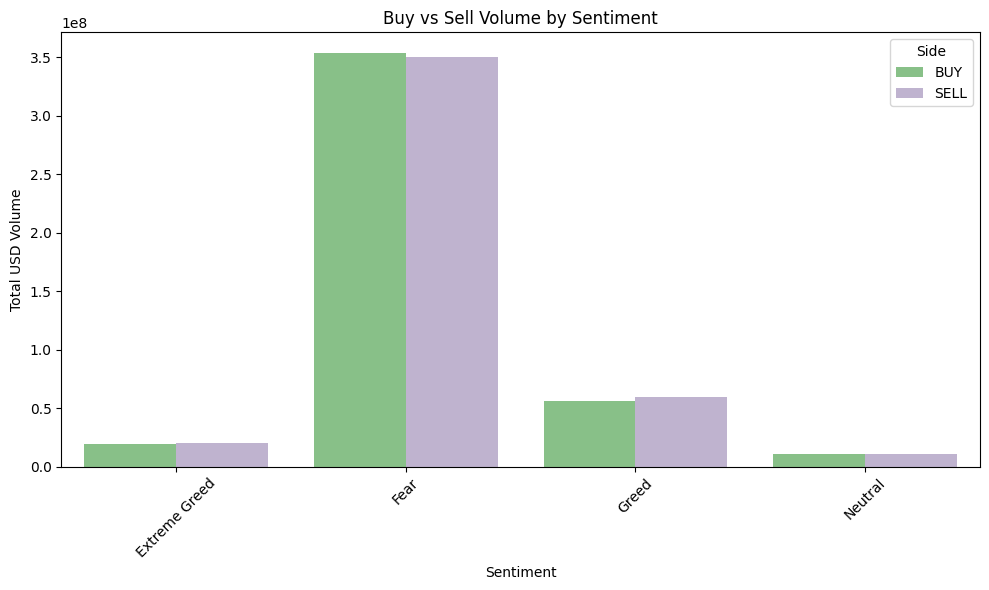

In [86]:
buy_sell_volume = merged_df.groupby(["classification","Side"])["Size USD"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=buy_sell_volume, x="classification", y="Size USD", hue="Side", palette="Accent")
plt.title("Buy vs Sell Volume by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Total USD Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


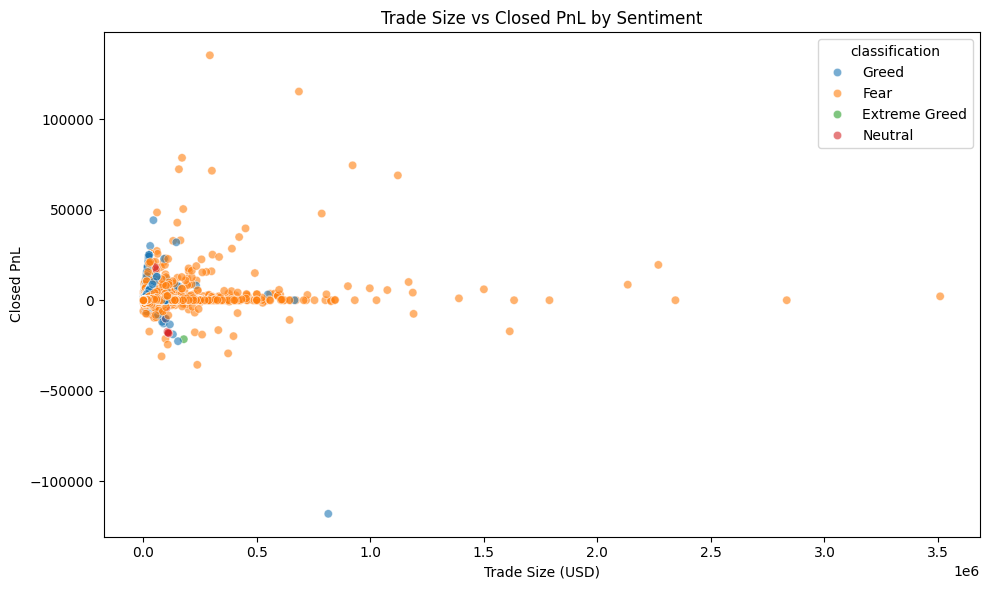

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="Size USD", y="Closed PnL", hue="classification", alpha=0.6)
plt.title("Trade Size vs Closed PnL by Sentiment")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Closed PnL")
plt.tight_layout()
plt.show()


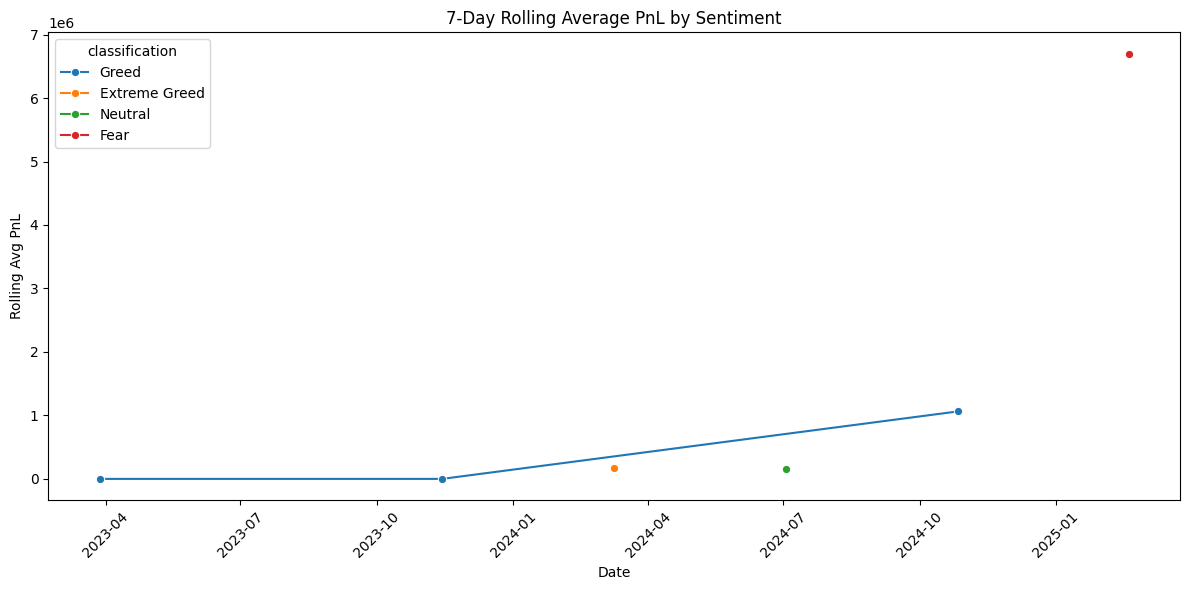

In [88]:
# Daily aggregated PnL
daily_pnl = merged_df.groupby(["date","classification"])["Closed PnL"].sum().reset_index()
daily_pnl["Rolling PnL"] = daily_pnl.groupby("classification")["Closed PnL"].transform(lambda x: x.rolling(7, min_periods=1).mean())

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_pnl, x="date", y="Rolling PnL", hue="classification", marker="o")
plt.title("7-Day Rolling Average PnL by Sentiment")
plt.xlabel("Date")
plt.ylabel("Rolling Avg PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


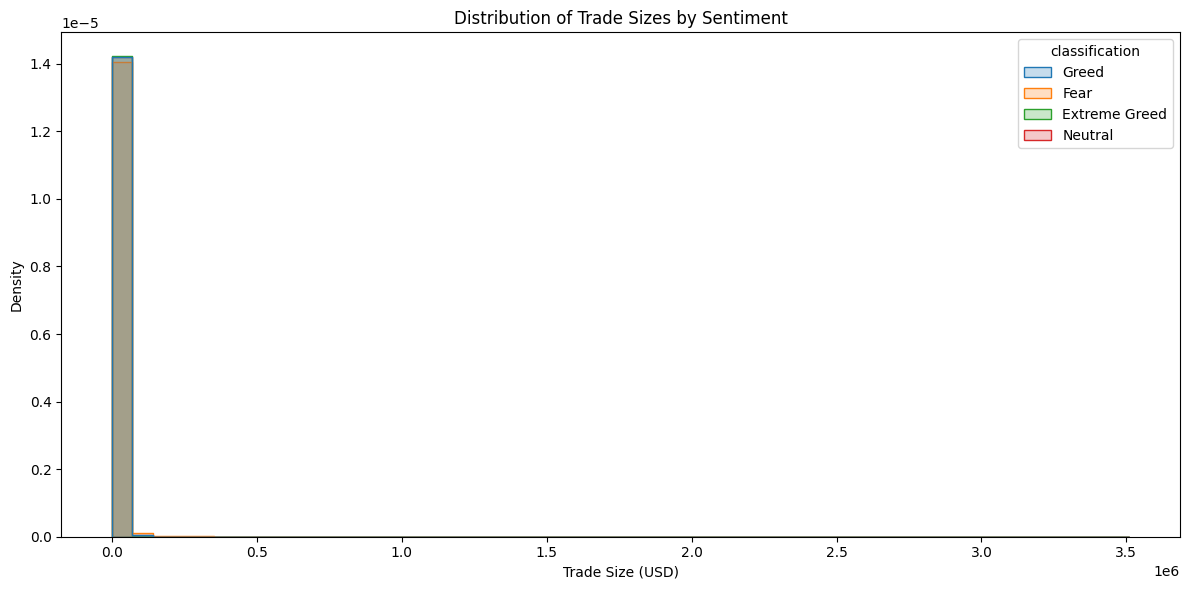

In [89]:
plt.figure(figsize=(12,6))
sns.histplot(data=merged_df, x="Size USD", hue="classification", element="step", stat="density", common_norm=False, bins=50)
plt.title("Distribution of Trade Sizes by Sentiment")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


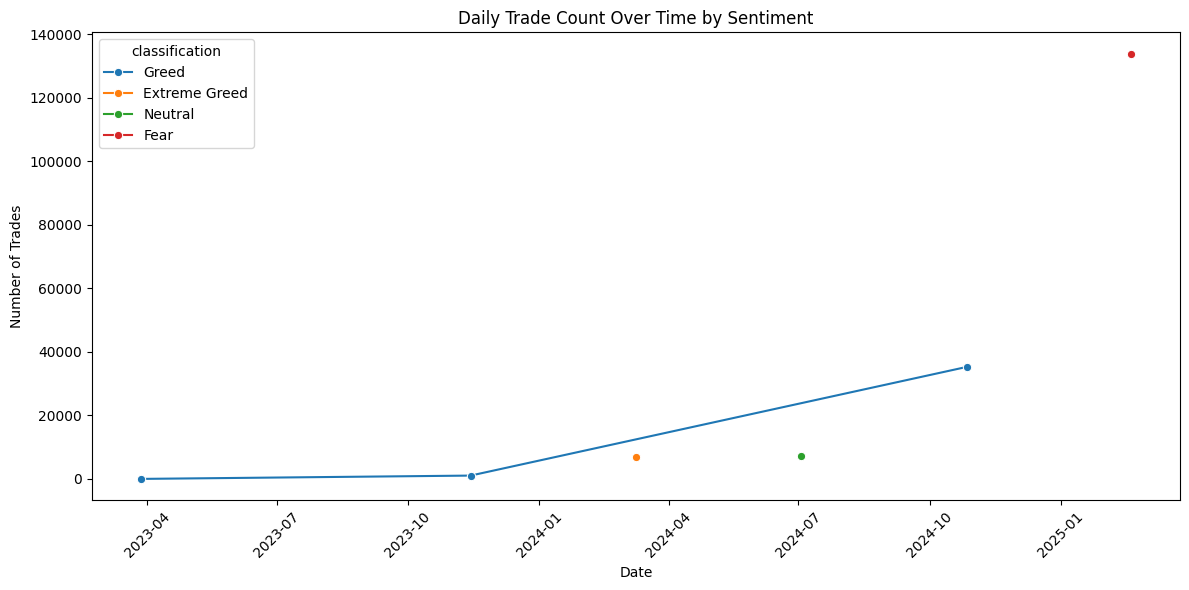

In [92]:
daily_trades = merged_df.groupby(["date","classification"]).size().reset_index(name="Trade Count")

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_trades, x="date", y="Trade Count", hue="classification", marker="o")
plt.title("Daily Trade Count Over Time by Sentiment")
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
